In [5]:
import sys
import os
import glob
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *



In [38]:
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr_7/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr7/1024x1448x512/'

inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(Ly/2.,-Ly/2.,Ny)

flist = glob.glob(directory+"*means*")
flist.sort()
print([f.split('/')[-1] for f in flist])


Params for this run:
	Mc = 0.2
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024.0x1448.0x512.0
	L = 150.0x200.0x75.0
['shearlayer_means_0012.dat', 'shearlayer_means_0013.dat', 'shearlayer_means_0014.dat', 'shearlayer_means_0015.dat', 'shearlayer_means_0016.dat', 'shearlayer_means_0017.dat', 'shearlayer_means_0018.dat', 'shearlayer_means_0019.dat', 'shearlayer_means_0020.dat']


/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/


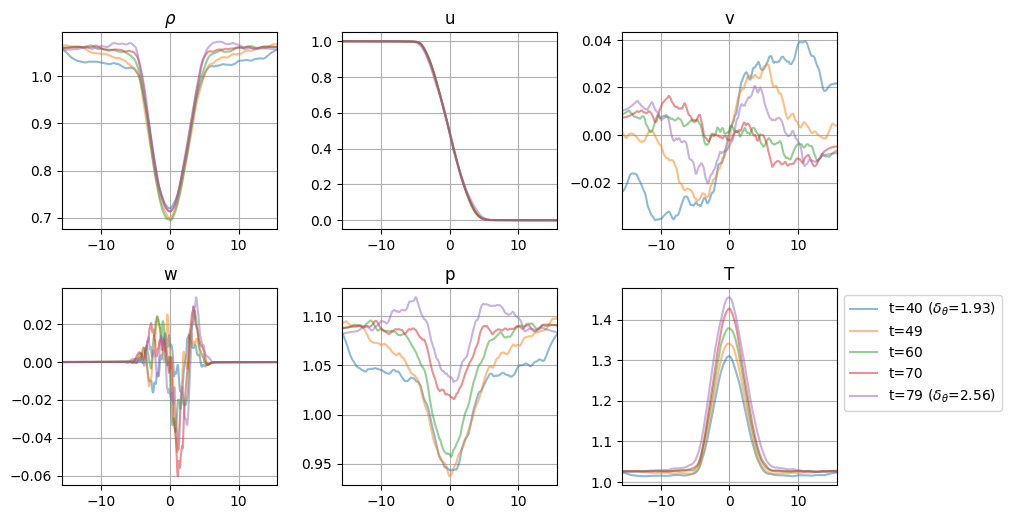

In [43]:

def plot_qbar(directory,inp,flist_plot,idx=0,savename=''):
    fig,ax = plt.subplots(2,3,figsize=(10,6), dpi=100)

    if len(flist_plot)>=15: flist_plot = flist_plot[::2]
    alpha = 0.5

    for count,fname in enumerate(flist_plot):
        tID = fname.split('_')[-1]
        tID = int(tID.split('.dat')[0])
        time = nml.read_time(directory,tID)

        # Get eta
        dtheta = get_dtheta(directory,time)
        eta = y/dtheta

        if (count==0 or count==len(flist_plot)-1):
            lbl = r't=%d ($\delta_{\theta}$=%0.2f)'%(time,dtheta)
        else: 
            lbl = 't=%d'%time
            
        # Get means
        dat = np.fromfile( directory + 'shearlayer_means_%04d'%(tID)+'.dat',dtype=float, count=-1, sep=' ')
        dat = np.reshape(dat,[Ny,6])
        ax[0,0].plot(eta,dat[:,0],alpha=alpha,label=lbl)
        ax[0,1].plot(eta,-dat[:,1],alpha=alpha,label=lbl)
        ax[0,2].plot(eta,dat[:,2],alpha=alpha,label=lbl)
        ax[1,0].plot(eta,dat[:,3],alpha=alpha,label=lbl)
        ax[1,1].plot(eta,dat[:,4],alpha=alpha,label=lbl)
        ax[1,2].plot(eta,dat[:,-2]/dat[:,0],alpha=alpha,label=lbl)
        
    titles = [r'$\rho$','u','v','w','p','T']
    for i,a in enumerate(ax.flatten()):
        a.grid(True)
        a.set_xlim([min(y)/dtheta,max(y)/dtheta])
        a.set_title(titles[i])
        i+=1
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    ax[1,2].legend(bbox_to_anchor=(1,1))

    # set the overall title and save
    # fig.suptitle('Time: {}'.format(np.around(reader.time,-1)),size=fs,y=0.95)
    if savename:
        fig.savefig(savename, dpi=200,bbox_inches='tight')
        plt.close(fig)
        print "Saved plot to ",savename
    else: 
        print(directory)
        fig.show()

plot_qbar(directory,inp,flist[:],idx=0,savename='')

In [46]:
s = '_7'

if s=='1': Mc_list = ['02','04','08','12','16','20']
else: Mc_list = ['02','08','20']

for Mc in Mc_list:
    directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr%s/1024x1448x512/'%(Mc,s)
    inp = nml.inputs(directory,verbose=False)
    Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=False)
    Ny = int(Ny)
    y = np.linspace(-Ly/2.,Ly/2.,Ny)

    flist = glob.glob(directory+"*means*")
    flist.sort()

    tlist,dlist,rates = growth_rates(directory+'shearlayer_')

    # Plot Rij
    plot_qbar(directory,inp,flist[:],idx=0,savename=directory+'/img/qbar.png')
print('Done')

Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr_7/1024x1448x512//img/qbar.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc08/rr_7/1024x1448x512//img/qbar.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr_7/1024x1448x512//img/qbar.png
Done
